In [2]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Criando o dataframe com todos os excel

In [3]:
month = {'jan': 1, 'fev': 2, 'mar':3, 'abr':4,'mai':5, 'jun':6, 'jul': 7, 'ago':8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}
path = pathlib.Path('archive')

airbnb_base = pd.DataFrame()

for file in path.iterdir():
    if file.name[:3] != 'tot':
        month_name = file.name[:3]
        mes = month[month_name]
        
        year = file.name[-8:]
        year = int(year.replace('.csv', ''))
        
        df = pd.read_csv(path / file.name)
        df['ano'] = year
        df['mes'] = mes
        airbnb_base = airbnb_base._append(df, ignore_index=True)

display(airbnb_base)

C:\Users\samue\AppData\Local\Temp\ipykernel_2552\3675437442.py:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path / file.name)
C:\Users\samue\AppData\Local\Temp\ipykernel_2552\3675437442.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path / file.name)
C:\Users\samue\AppData\Local\Temp\ipykernel_2552\3675437442.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path / file.name)
C:\Users\samue\AppData\Local\Temp\ipykernel_2552\3675437442.py:14: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path / file.name)
C:\Users\samue\AppData\Local\Temp\ipykernel_2552\3675437442.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memor

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
902206,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
902207,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
902208,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


### Analisando os dados e separando as colunas que vai ser utilizado

In [4]:
print(list(airbnb_base.columns))
airbnb_base.head(1000).to_csv('primeiros_registros.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [5]:
colunms = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']

airbnb_base = airbnb_base.loc[:, colunms]

airbnb_base

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902206,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902207,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
902208,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


### Tratando valores

- Visualizando os dados, com isso percebendo que existe algumas colunas que foram separadas com muitos valores nulos, as colunas com mais de 300000 valores NaN foram excluidas da análise.
- Para as outras colunas, como a base de dados apresenta muitos dados(mais de 900000), foram excluidas as linhas

In [6]:

for colunm in airbnb_base:
    if airbnb_base[colunm].isnull().sum() > 300000:
        airbnb_base = airbnb_base.drop(colunm, axis=1)

print(airbnb_base.isnull().sum())


host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [7]:
airbnb_base = airbnb_base.dropna()

print(airbnb_base.shape)
print(airbnb_base.isnull().sum())


(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificar tipos de dados

In [8]:
print(airbnb_base.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


In [9]:
print(airbnb_base.iloc[1])

host_is_superhost                                                           t
host_listings_count                                                       2.0
latitude                                                           -22.965919
longitude                                                          -43.178962
property_type                                                     Condominium
room_type                                                     Entire home/apt
accommodates                                                                5
bathrooms                                                                 1.0
bedrooms                                                                  2.0
beds                                                                      2.0
bed_type                                                             Real Bed
amenities                   {TV,"Cable TV",Internet,Wifi,"Air conditioning...
price                                                           

- Como preço(price) e pessoa extra(extra_people) estão sendo reconhecidos com objeto(ao inves de ser um float)temos que mudar o tipo de variavel da coluna

In [10]:
# price
airbnb_base['price'] = airbnb_base['price'].str.replace('$', '')
airbnb_base['price'] = airbnb_base['price'].str.replace(',', '')
airbnb_base['price'] = airbnb_base['price'].astype(np.float32, copy=False)

# extra_people
airbnb_base['extra_people'] = airbnb_base['extra_people'].str.replace('$', '')
airbnb_base['extra_people'] = airbnb_base['extra_people'].str.replace(',', '')
airbnb_base['extra_people'] = airbnb_base['extra_people'].astype(np.float32, copy=False)

In [11]:
print(airbnb_base.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

<Axes: >

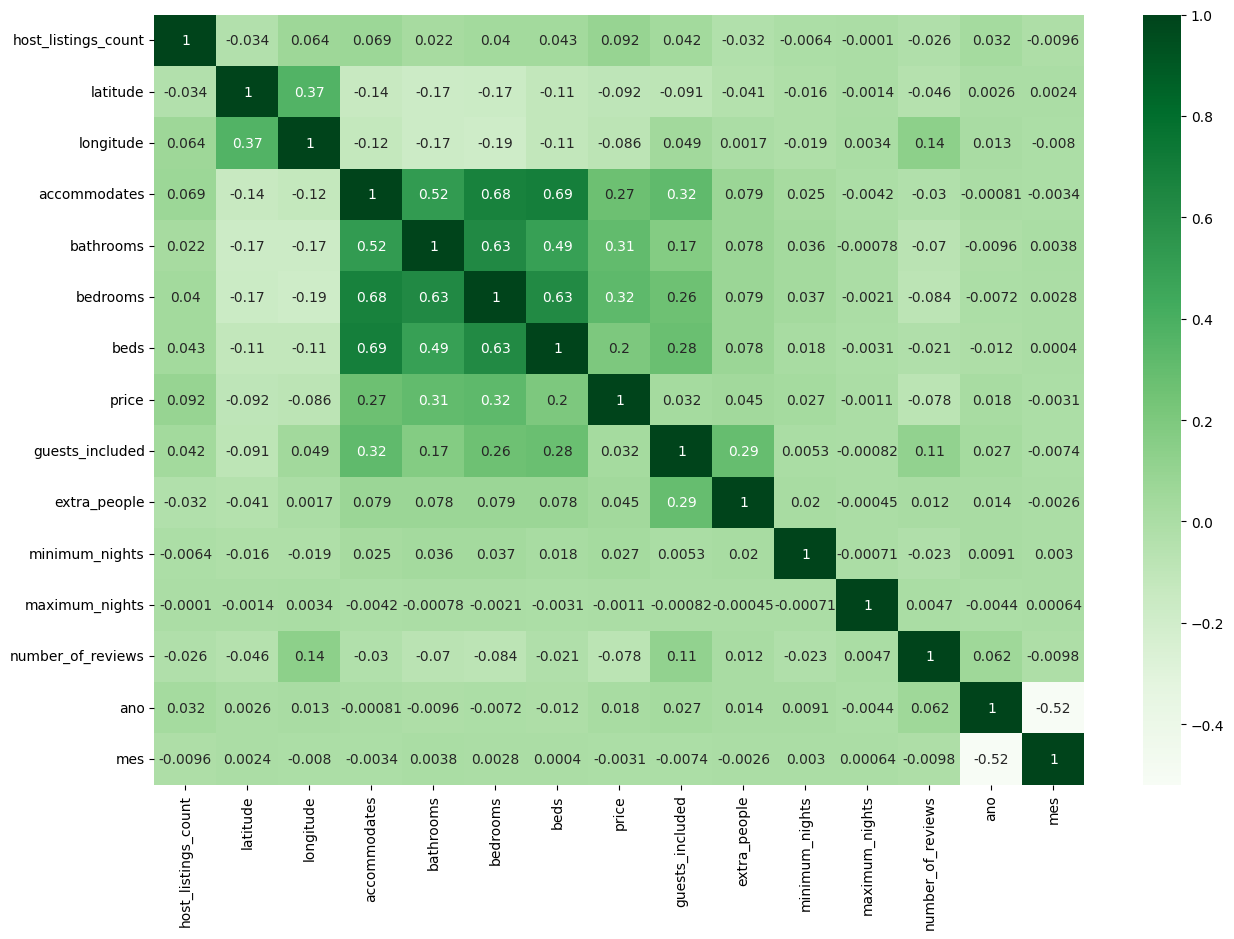

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(airbnb_base.corr(numeric_only=True), annot=True, cmap='Greens')
# print(airbnb_base.corr(numeric_only=True))

### Funções para analisar outliers

In [13]:
def limites(colunm):
    q1 = colunm.quantile(0.25)
    q3 = colunm.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def delet_outliers(df, column_name):
    qtd_line = df.shape[0]
    lim_inf, lim_sup = limites(df[column_name])
    df = df.loc[(df[column_name] >= lim_inf) & (df[column_name] <= lim_sup), :]
    remove_line = qtd_line - df.shape[0]
    return df, remove_line

In [14]:
def box_diagram(colunm):
    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=colunm, ax=ax1)
    ax2.set_xlim(limites(colunm))
    sns.boxplot(x=colunm, ax=ax2)

def histogram(column):
    plt.figure(figsize=(15,5))
    sns.histplot(column, kde=True, kde_kws=dict(cut=3), stat='density', element='bars', bins=50)

def bar_grafic(column):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts(), color='Orange')
    ax.set_xlim(limites(column))


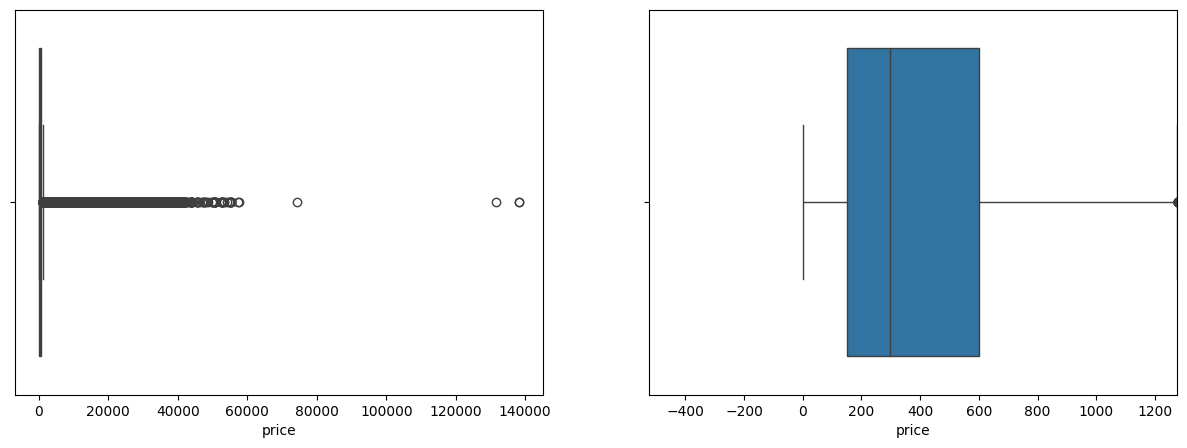

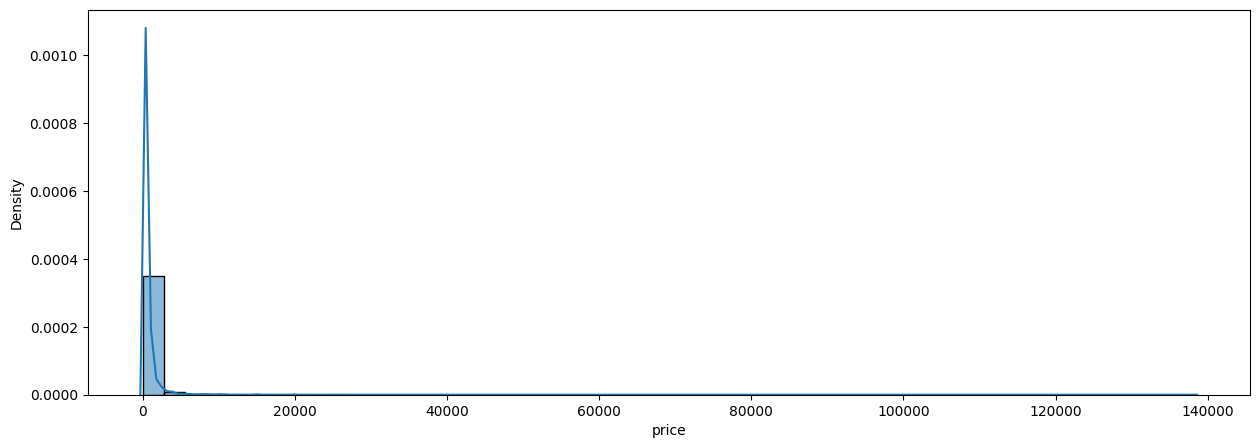

In [15]:
box_diagram(airbnb_base['price'])
histogram(airbnb_base['price'])

In [16]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'price')
print('{} linhas removidas'.format(qtd_lines))

87282 linhas removidas


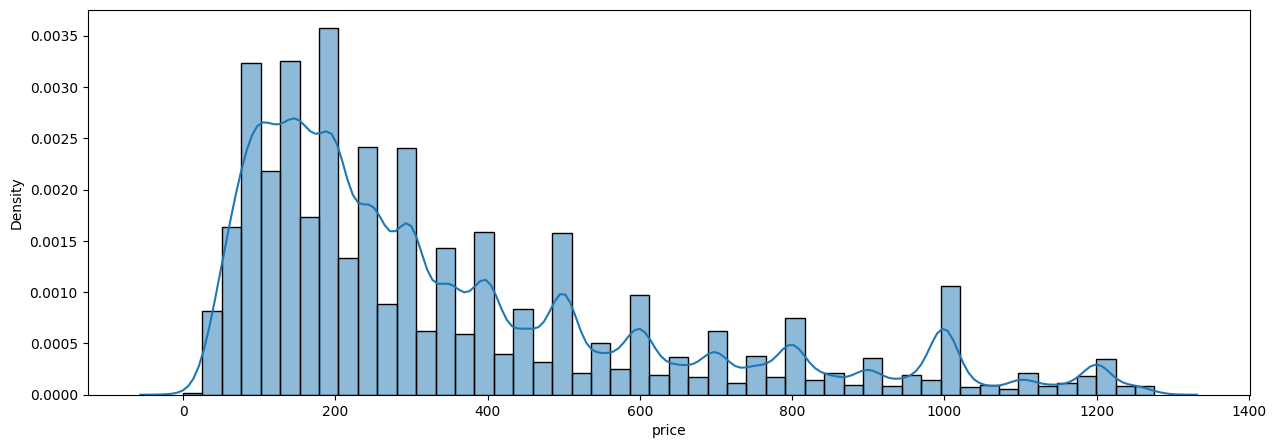

In [17]:
histogram(airbnb_base['price'])

### EXTRA_PEOPLE

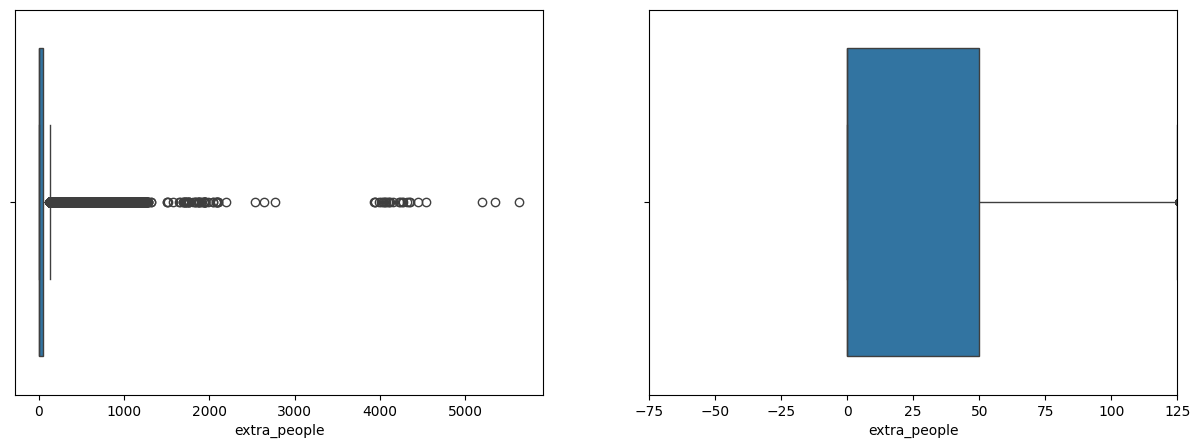

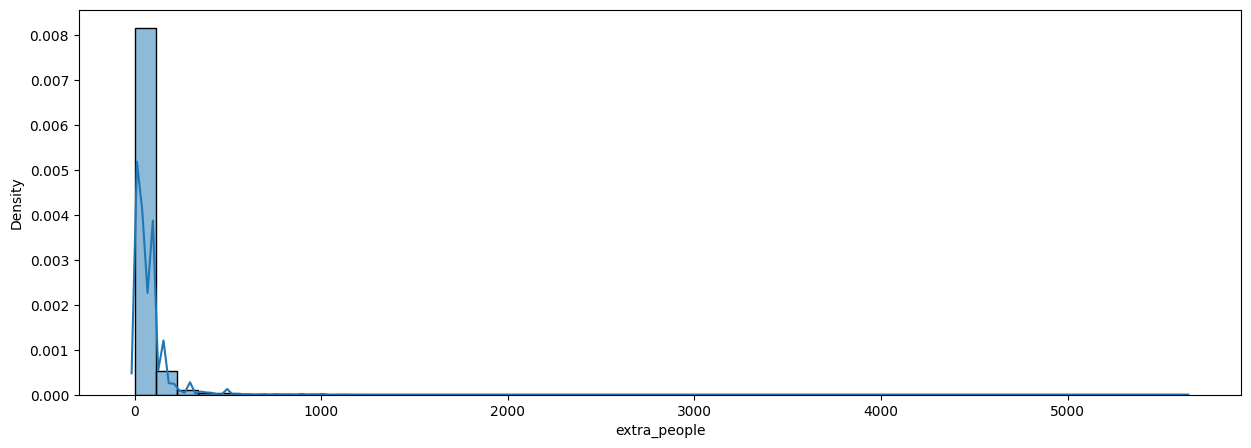

In [18]:
box_diagram(airbnb_base['extra_people'])
histogram(airbnb_base['extra_people'])

In [19]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'extra_people')
print('{} linhas removidas'.format(qtd_lines))

59194 linhas removidas


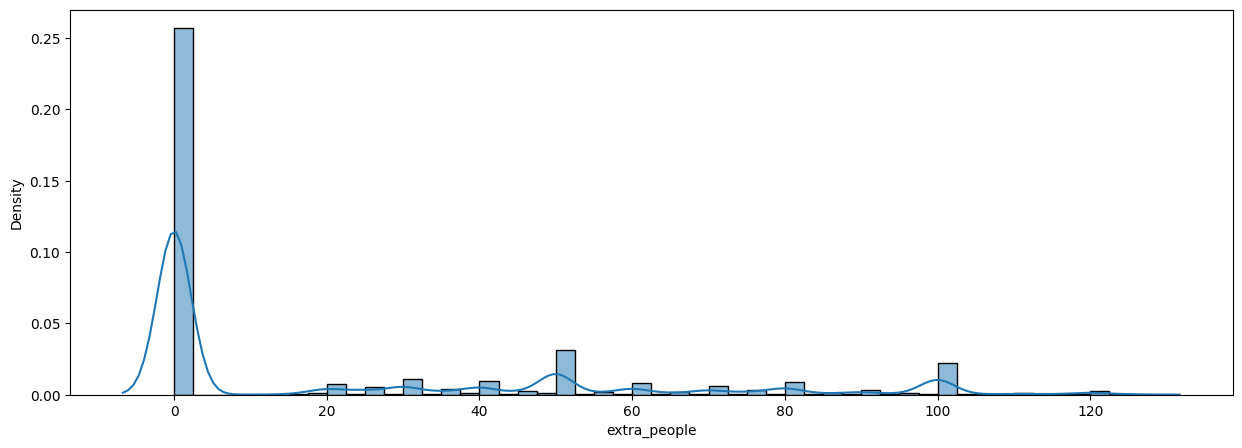

In [20]:
histogram(airbnb_base['extra_people'])

### host_is_superhost

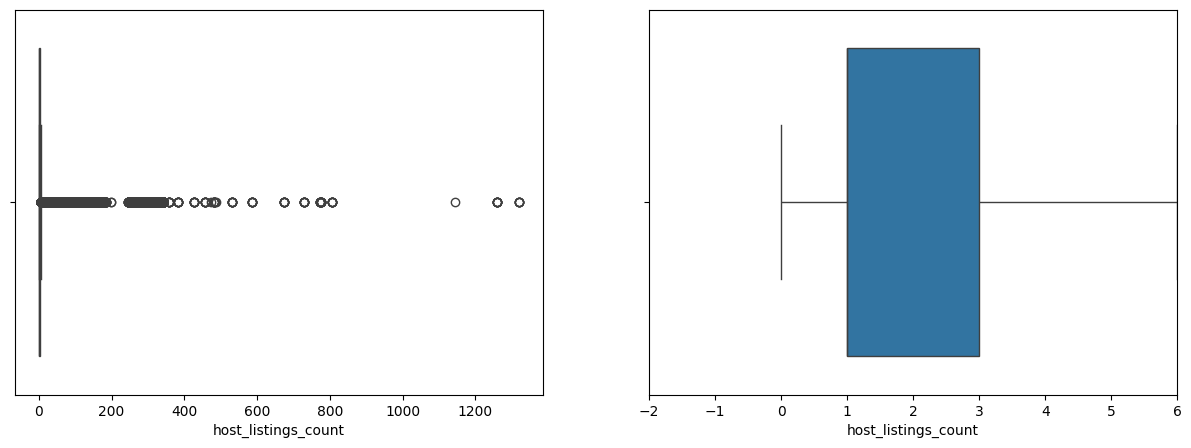

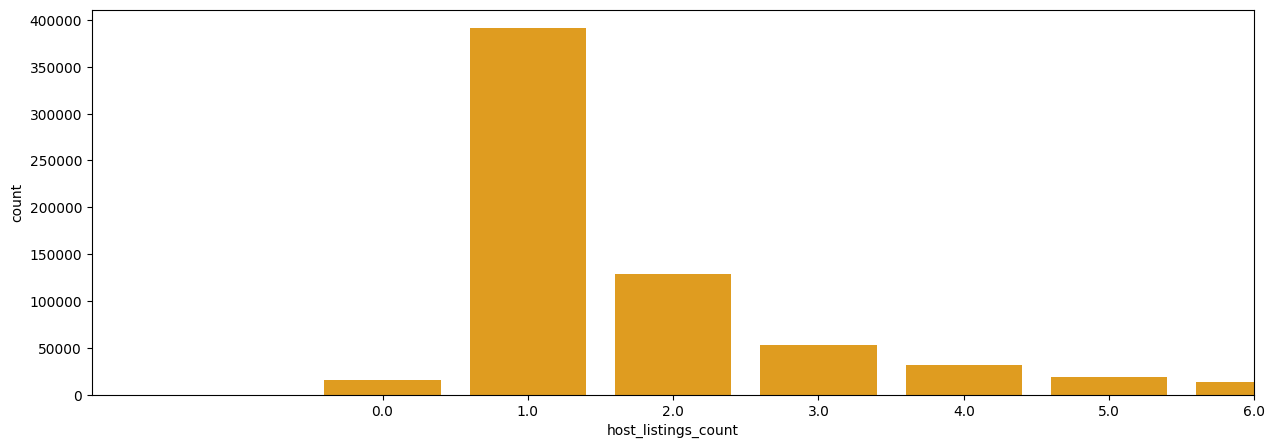

In [21]:
box_diagram(airbnb_base['host_listings_count'])
bar_grafic(airbnb_base['host_listings_count'])

In [22]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'host_listings_count')
print('{} linhas removidas'.format(qtd_lines))

97723 linhas removidas


### accommodates

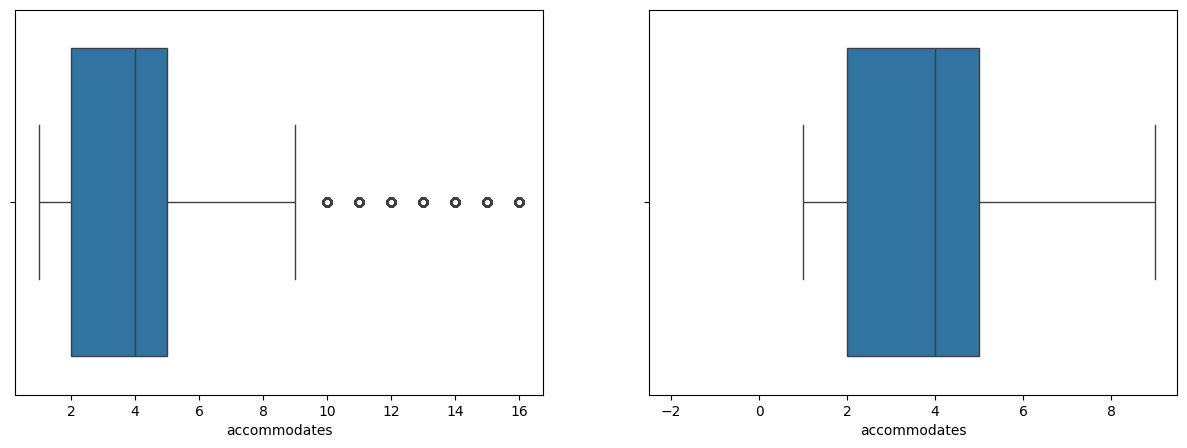

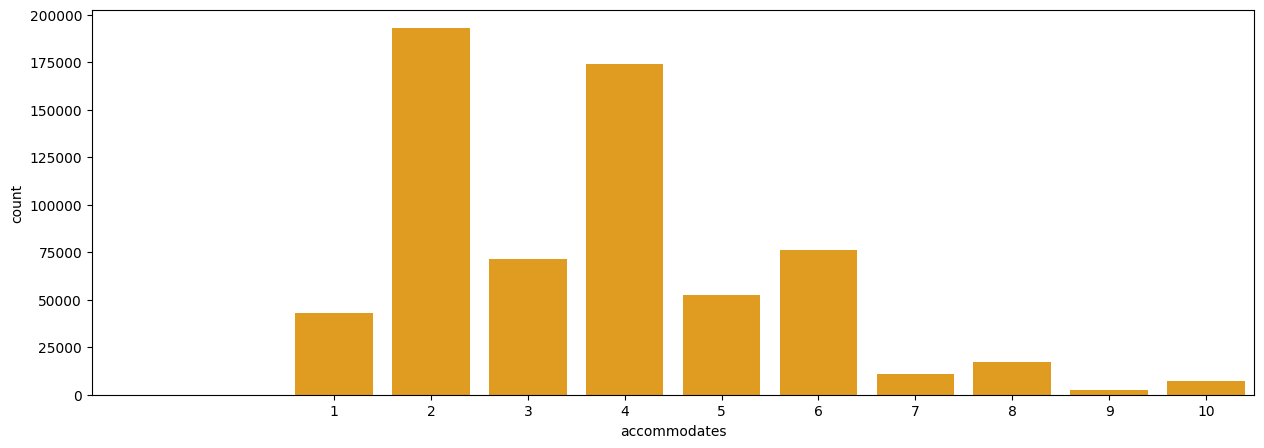

In [23]:
box_diagram(airbnb_base['accommodates'])
bar_grafic(airbnb_base['accommodates'])

In [24]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'accommodates')
print('{} linhas removidas'.format(qtd_lines))

13146 linhas removidas


### bathrooms

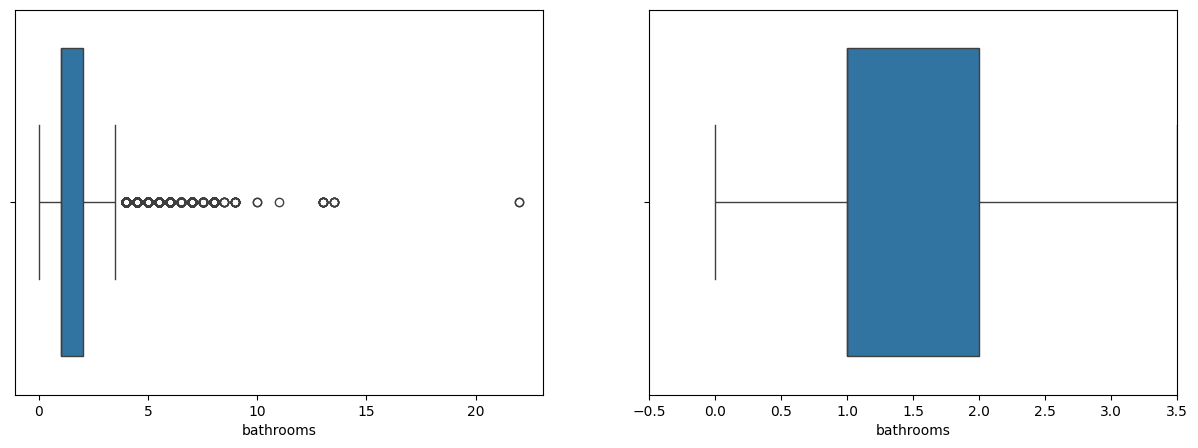

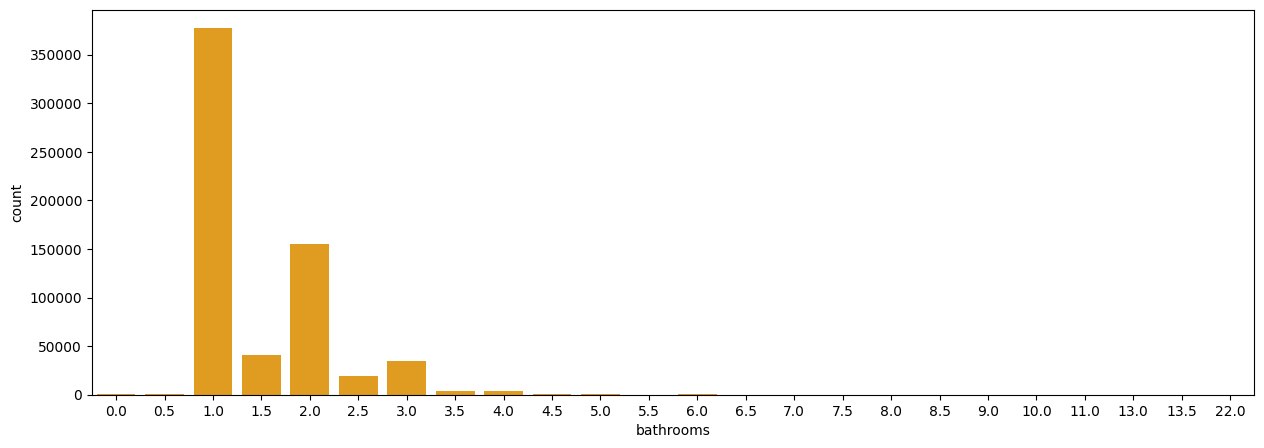

In [25]:
box_diagram(airbnb_base['bathrooms'])

plt.figure(figsize=(15,5))
ax = sns.barplot(x=airbnb_base['bathrooms'].value_counts().index, y=airbnb_base['bathrooms'].value_counts(), color='Orange')

In [26]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'bathrooms')
print('{} linhas removidas'.format(qtd_lines))

6894 linhas removidas


### bedrooms

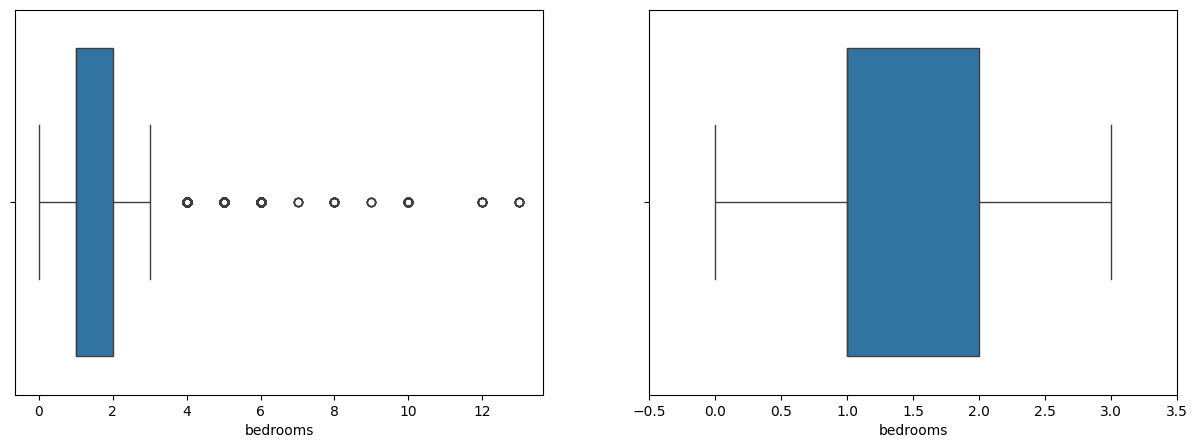

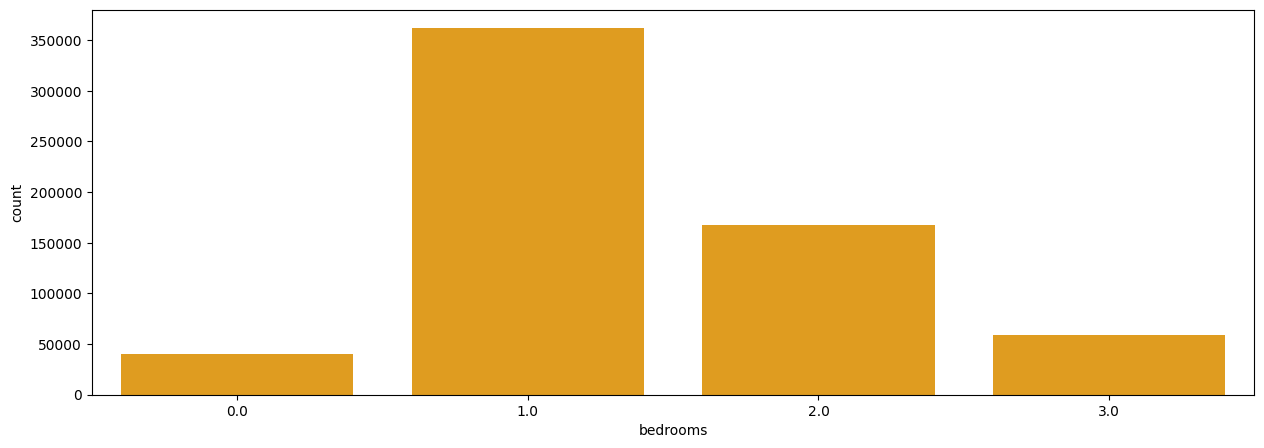

In [27]:
box_diagram(airbnb_base['bedrooms'])
bar_grafic(airbnb_base['bedrooms'])

In [28]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'bedrooms')
print('{} linhas removidas'.format(qtd_lines))

5482 linhas removidas


### beds

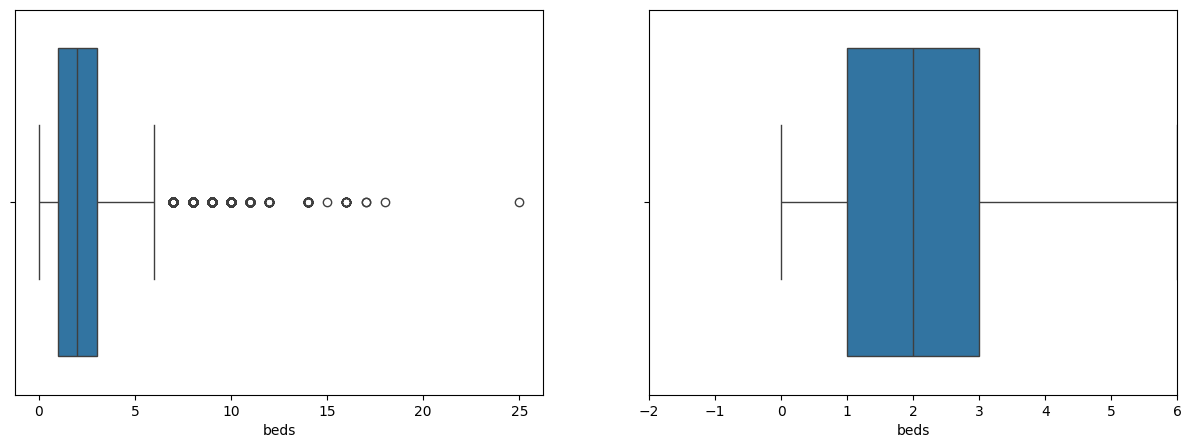

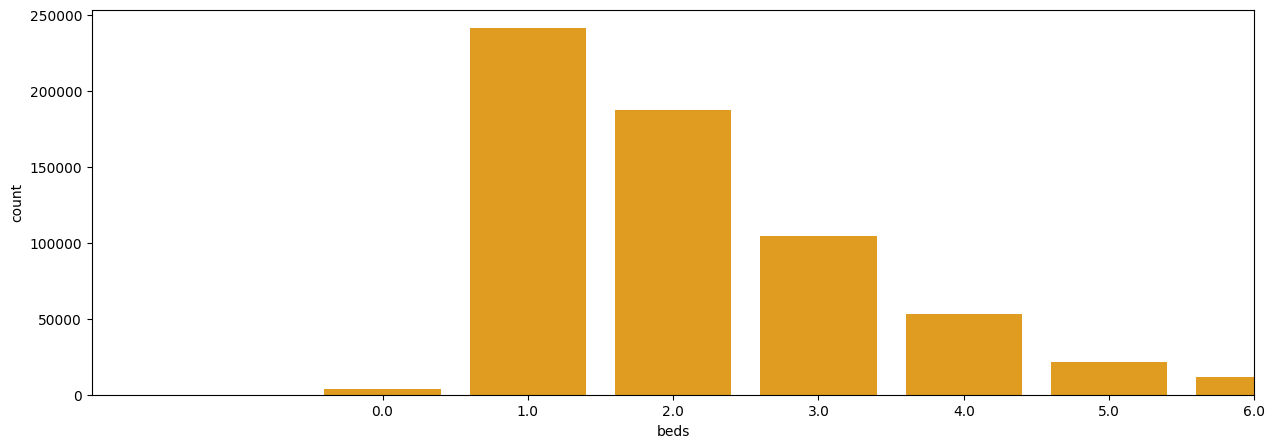

In [29]:
box_diagram(airbnb_base['beds'])
bar_grafic(airbnb_base['beds'])

In [30]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'beds')
print('{} linhas removidas'.format(qtd_lines))

5622 linhas removidas


### guests_included

(np.float64(1.0), np.float64(1.0))


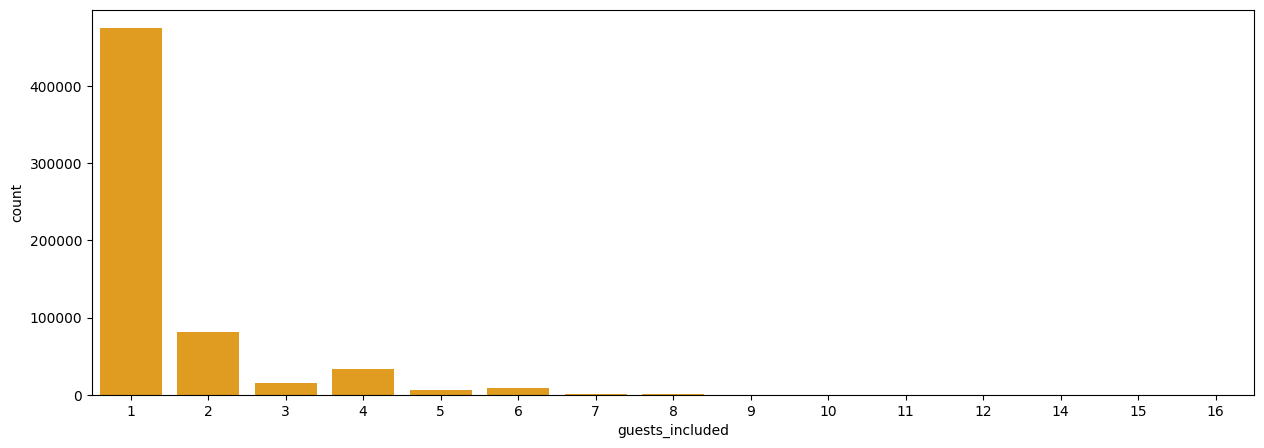

In [31]:
print(limites(airbnb_base['guests_included']))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=airbnb_base['guests_included'].value_counts().index, y=airbnb_base['guests_included'].value_counts(), color='Orange')

In [32]:
airbnb_base = airbnb_base.drop('guests_included', axis=1)
airbnb_base.shape

(622366, 22)

### minimum_nights

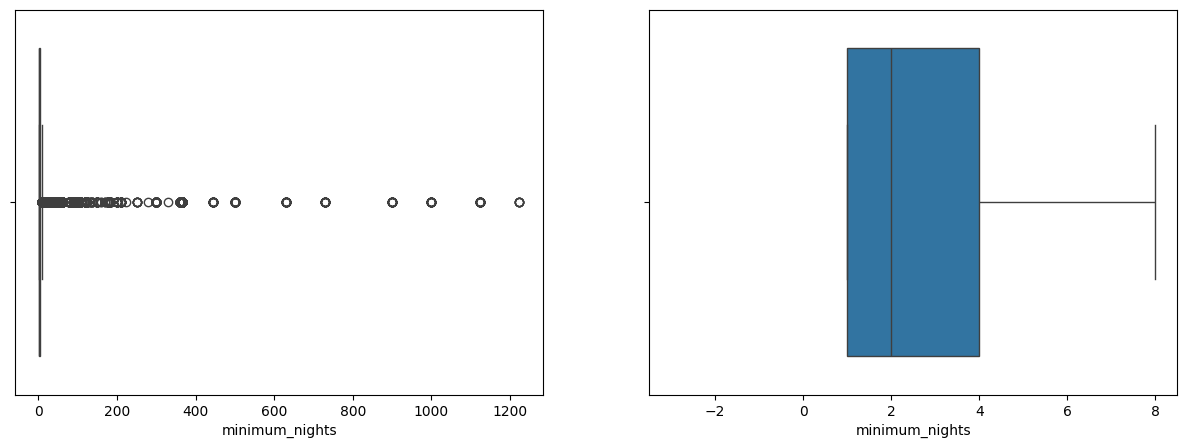

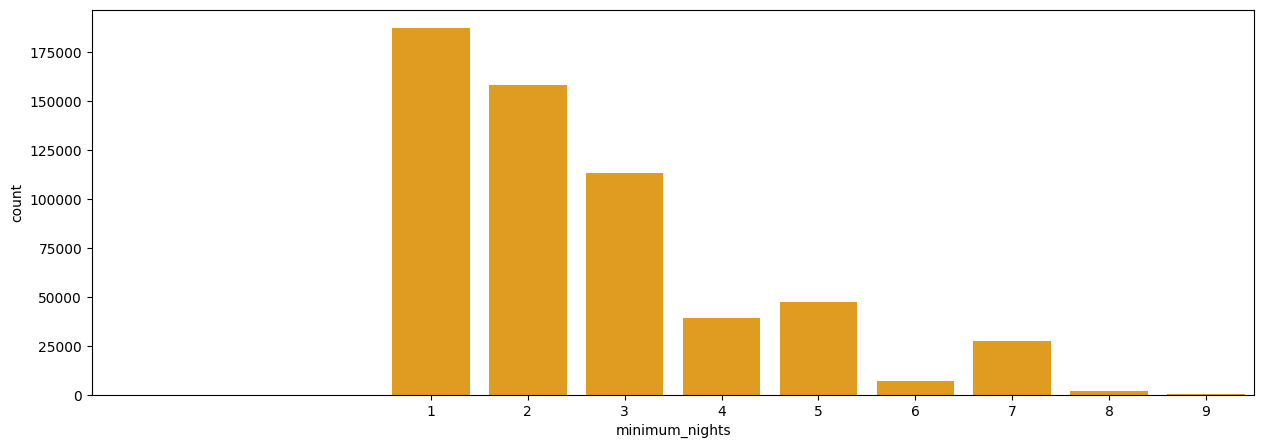

In [33]:
box_diagram(airbnb_base['minimum_nights'])
bar_grafic(airbnb_base['minimum_nights'])

In [34]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'minimum_nights')
print('{} linhas removidas'.format(qtd_lines))

40383 linhas removidas


### maximum_nights

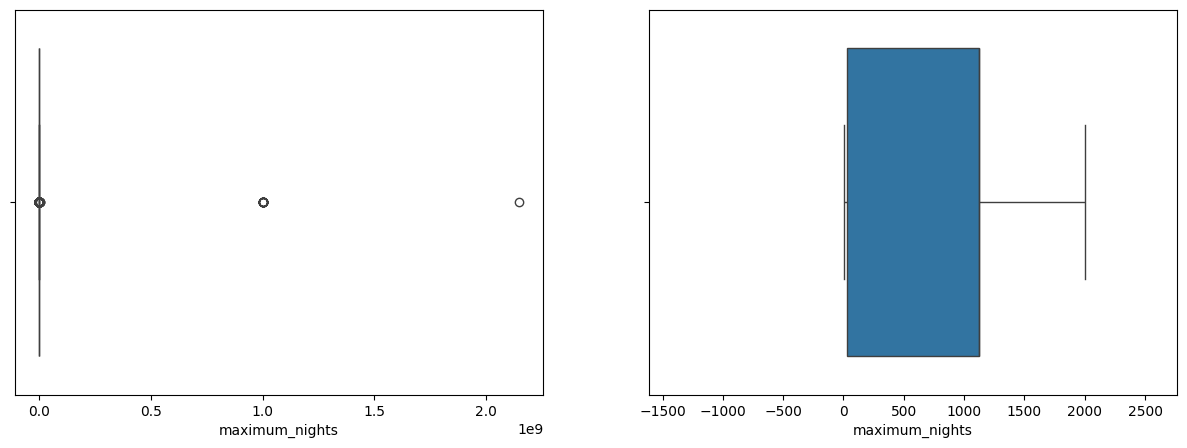

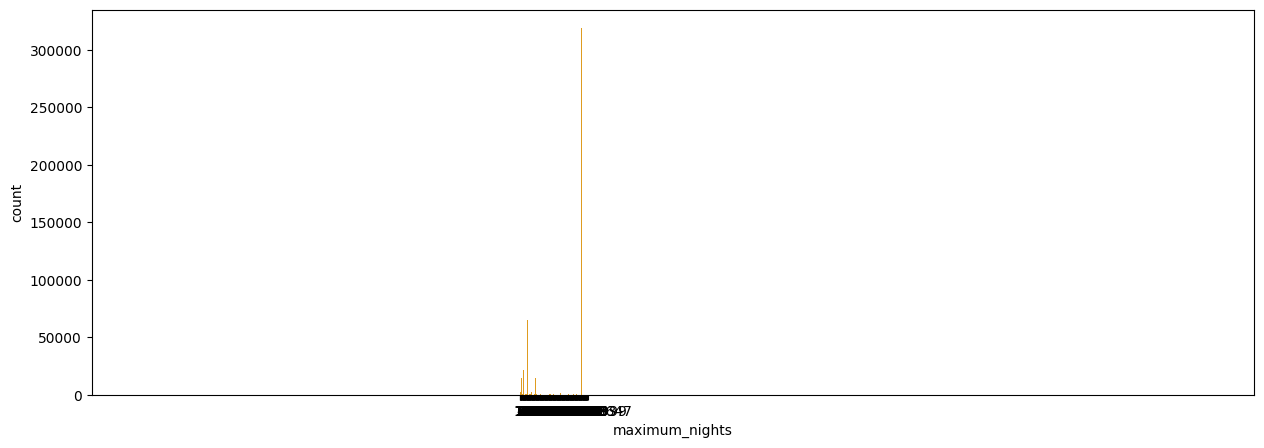

In [35]:
box_diagram(airbnb_base['maximum_nights'])
bar_grafic(airbnb_base['maximum_nights'])

In [36]:
airbnb_base = airbnb_base.drop('maximum_nights', axis=1)
airbnb_base.shape

(581983, 21)

### number_of_reviews

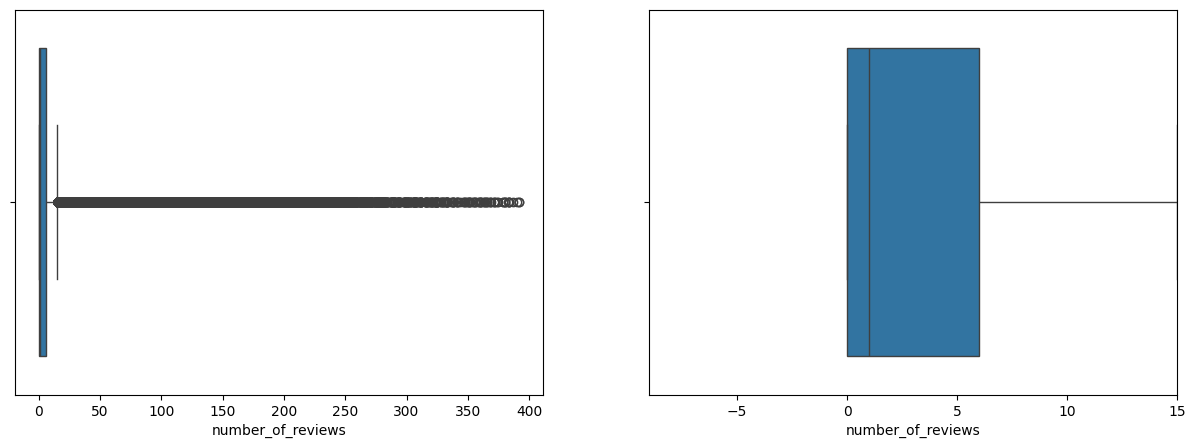

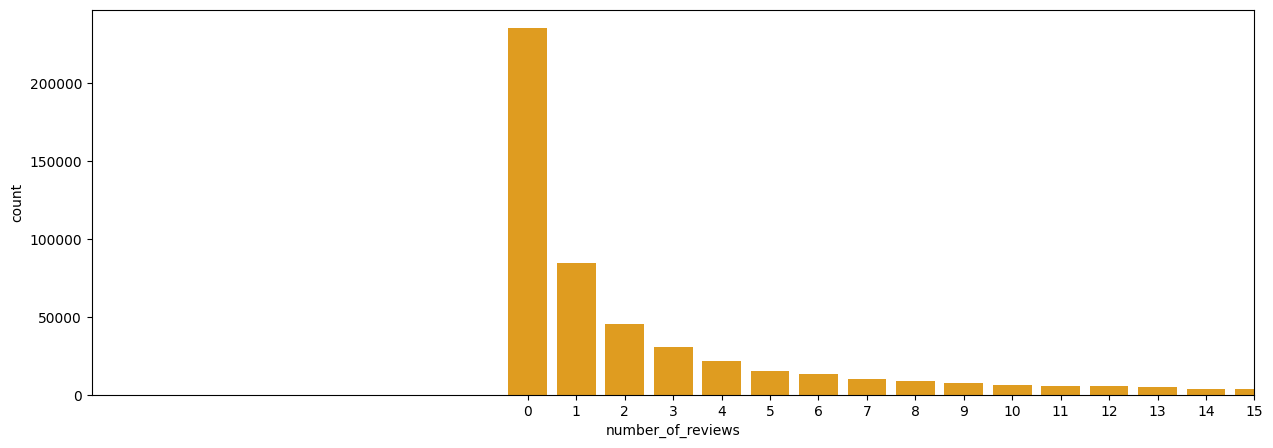

In [37]:
box_diagram(airbnb_base['number_of_reviews'])
bar_grafic(airbnb_base['number_of_reviews'])

In [38]:
airbnb_base = airbnb_base.drop('number_of_reviews', axis=1)
airbnb_base.shape

(581983, 20)

### ANALISE DE VALORES DO TIPO TEXTO

property_type
Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

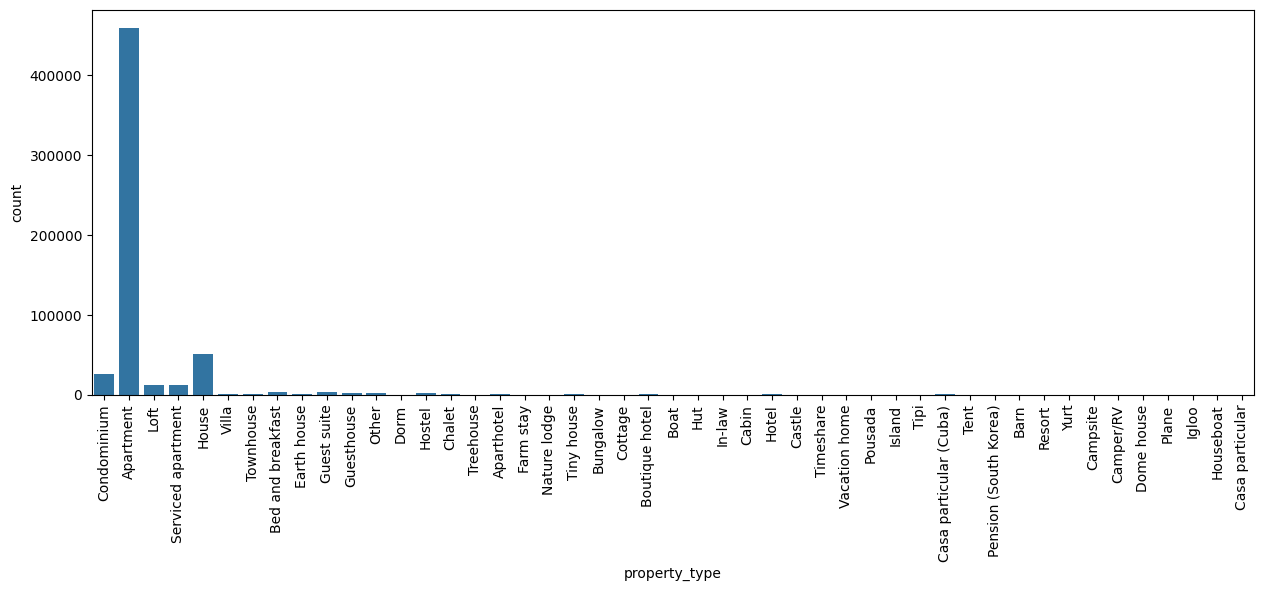

In [39]:
print(airbnb_base['property_type'].value_counts())
plt.figure(figsize=(15,5))
grafic = sns.countplot(x='property_type', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Igloo', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


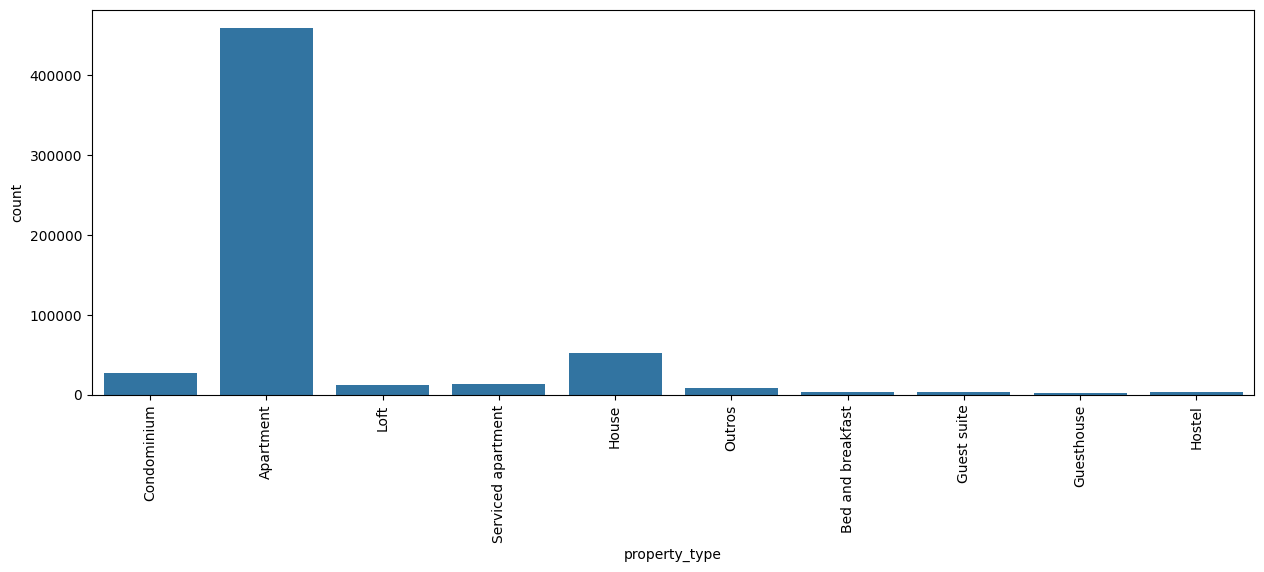

In [40]:
type_location = airbnb_base['property_type'].value_counts()
type_location_aux = []

for type in type_location.index:
    if type_location[type] < 2000:
        type_location_aux.append(type)
print(type_location_aux)

for type in type_location_aux:
    airbnb_base.loc[airbnb_base['property_type'] == type, 'property_type'] = 'Outros'

print(airbnb_base['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafic = sns.countplot(x='property_type', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

### room_type

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


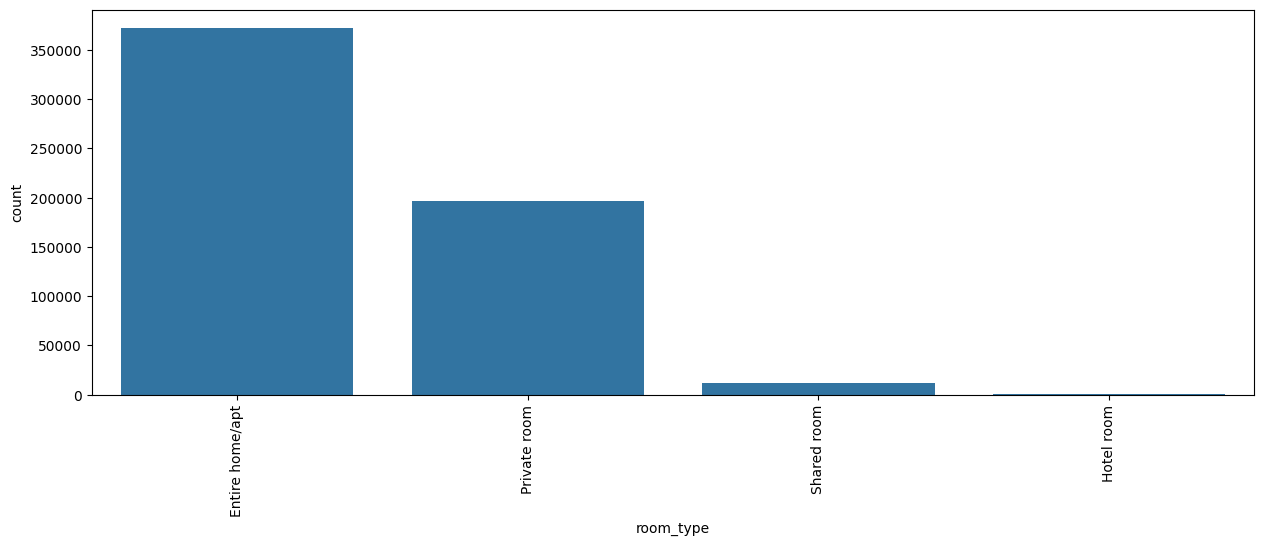

In [41]:
print(airbnb_base['room_type'].value_counts())
plt.figure(figsize=(15,5))
grafic = sns.countplot(x='room_type', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

### bed_type

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64


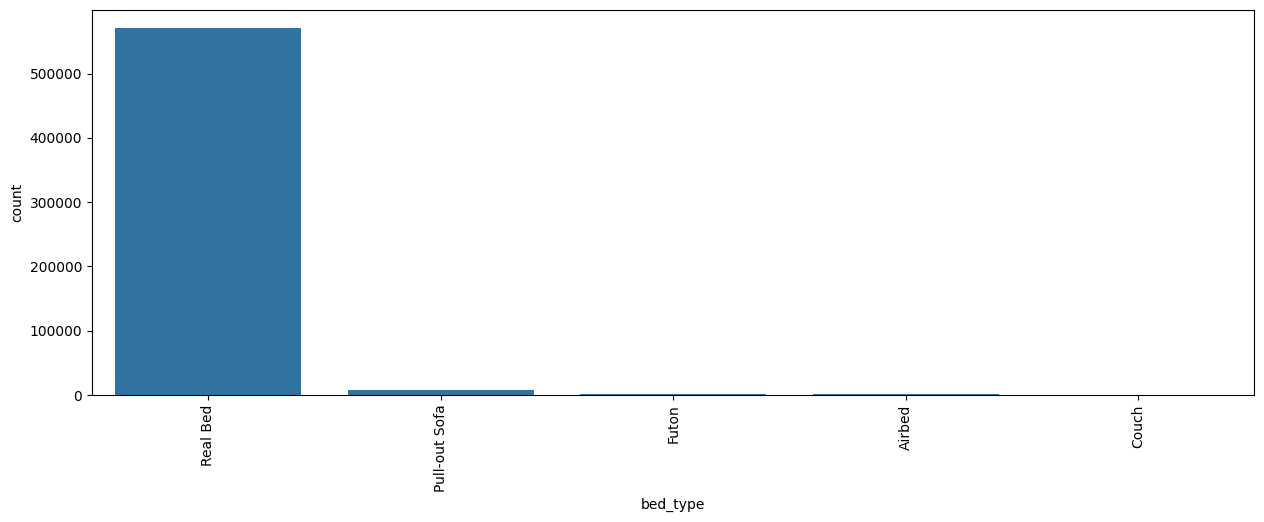

In [42]:
print(airbnb_base['bed_type'].value_counts())
plt.figure(figsize=(15,5))
grafic = sns.countplot(x='bed_type', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
bed_type
Real Bed    570643
outros       11340
Name: count, dtype: int64


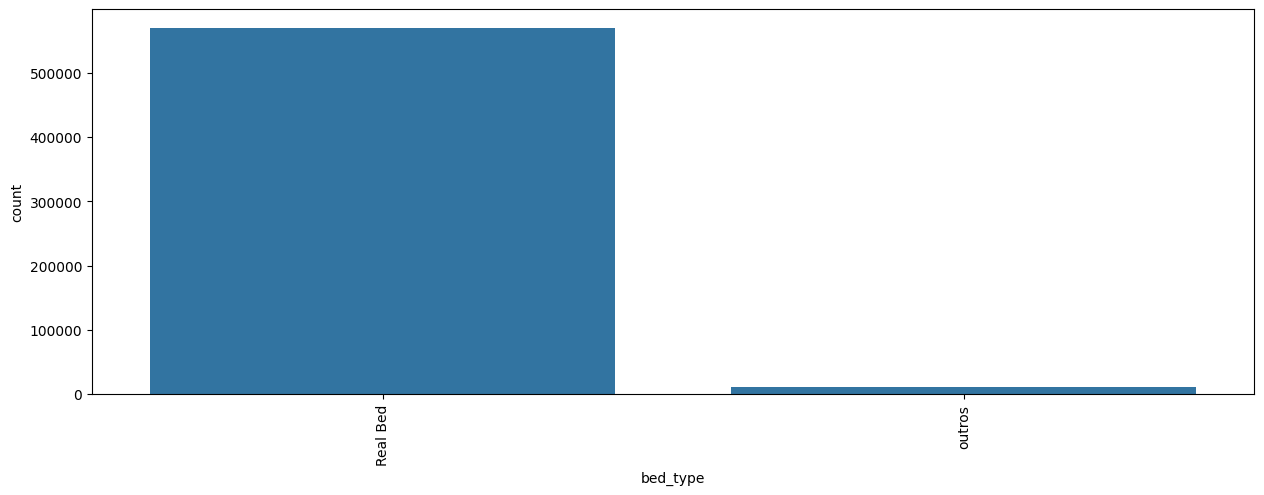

In [43]:
#agrupando categorias
type_location = airbnb_base['bed_type'].value_counts()
type_location_aux = []

for type in type_location.index:
    if type_location[type] < 10000:
        type_location_aux.append(type)
print(type_location_aux)

for type in type_location_aux:
    airbnb_base.loc[airbnb_base['bed_type'] == type, 'bed_type'] = 'outros'

print(airbnb_base['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafic = sns.countplot(x='bed_type', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

### cancellation_policy

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


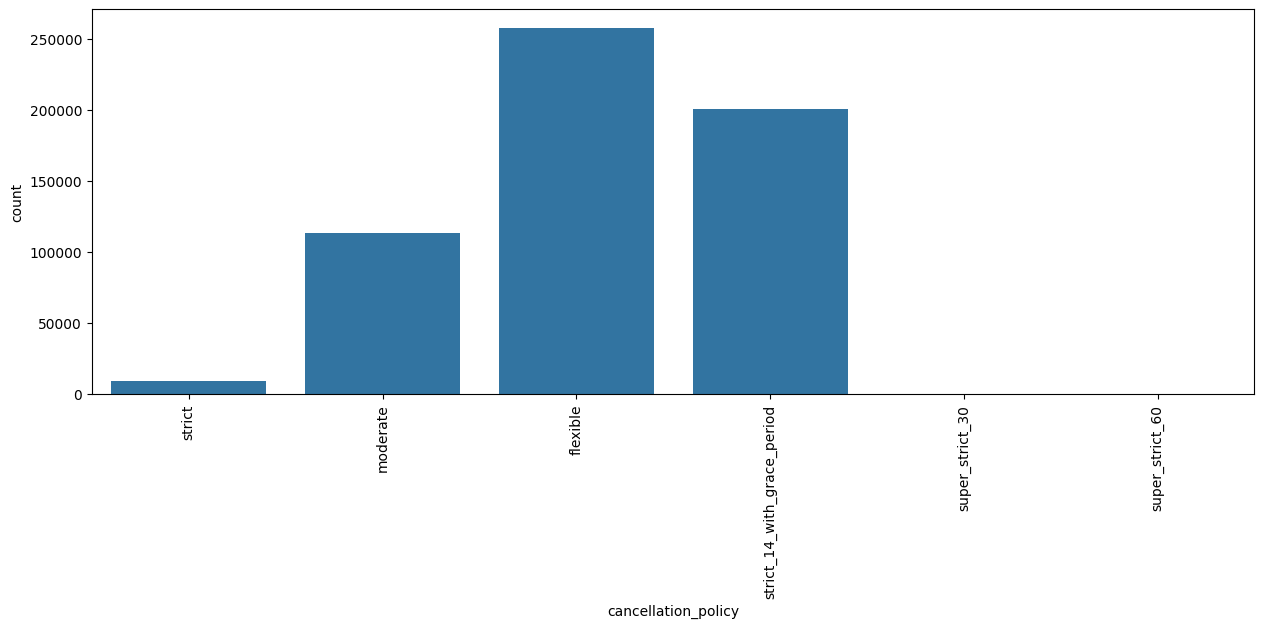

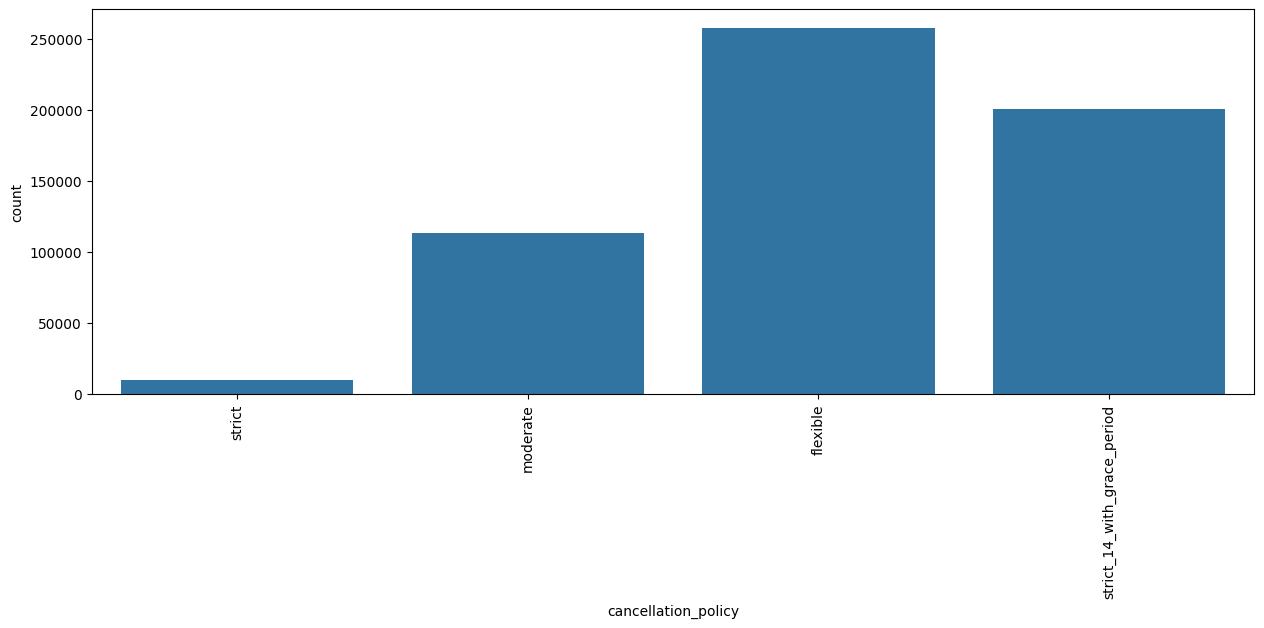

In [44]:
print(airbnb_base['cancellation_policy'].value_counts())
plt.figure(figsize=(15,5))
grafic = sns.countplot(x='cancellation_policy', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

#agrupando categorias
type_location = airbnb_base['cancellation_policy'].value_counts()
type_location_aux = []

for type in type_location.index:
    if type_location[type] < 10000:
        type_location_aux.append(type)
print(type_location_aux)

for type in type_location_aux:
    airbnb_base.loc[airbnb_base['cancellation_policy'] == type, 'cancellation_policy'] = 'strict'

print(airbnb_base['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
grafic = sns.countplot(x='cancellation_policy', data=airbnb_base)
grafic.tick_params(axis='x', rotation=90)

### amenities

In [45]:
airbnb_base['n_amenities'] = airbnb_base['amenities'].str.split(',').apply(len)

In [46]:
airbnb_base = airbnb_base.drop('amenities', axis=1)
airbnb_base.shape

(581983, 20)

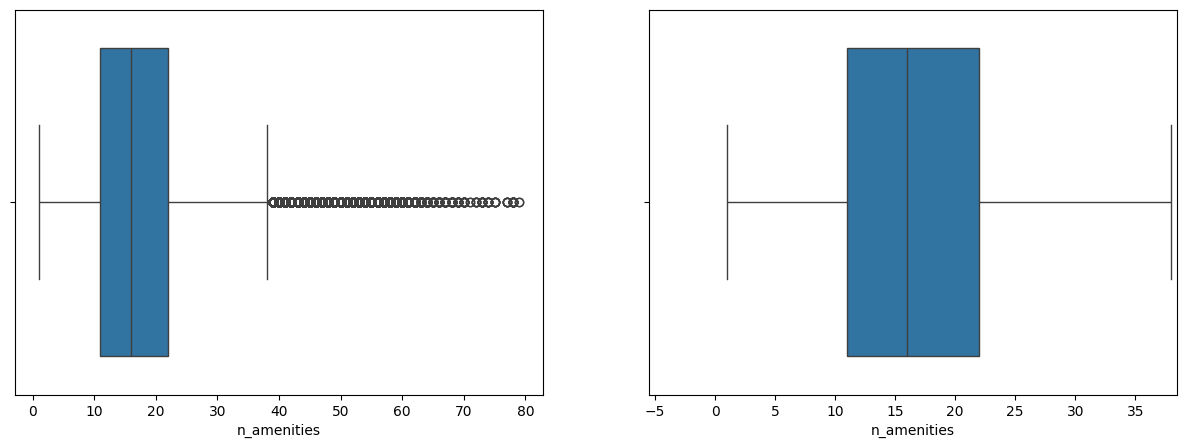

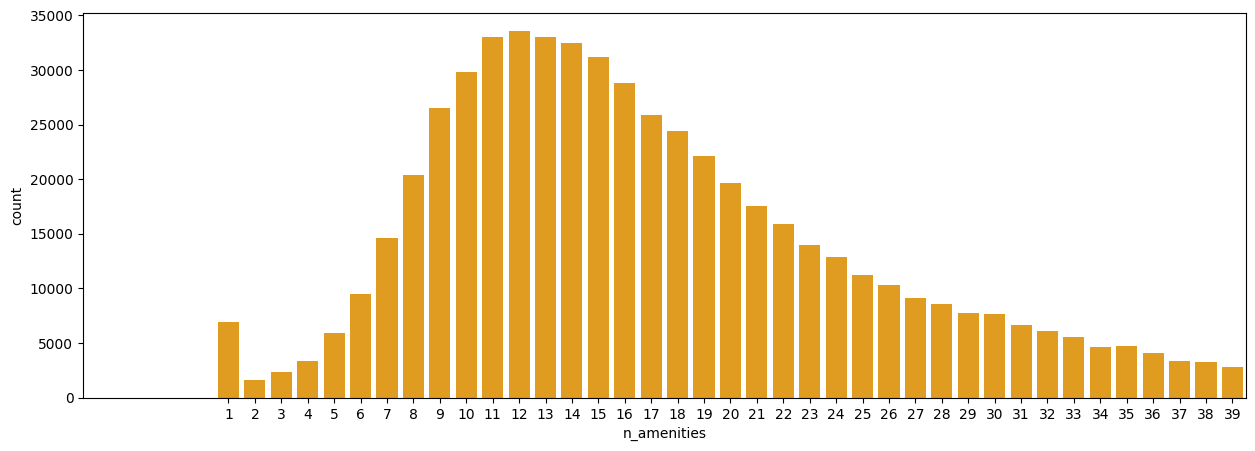

In [47]:
box_diagram(airbnb_base['n_amenities'])
bar_grafic(airbnb_base['n_amenities'])

In [48]:
airbnb_base, qtd_lines = delet_outliers(airbnb_base, 'n_amenities')
print('{} linhas removidas'.format(qtd_lines))

24343 linhas removidas


In [49]:
# amostra = airbnb_base.sample(n=5000)
# centro_mapa = {'lat': amostra.latitude.mean(), 'lon': amostra.longitude.mean()}
# mapa = px.density_map(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, center=centro_mapa, zoom=10)
# mapa.show()

### Encoding

Ajustar features do tipo string ou boolean para inteiro ou float
- Features de valores True ou False, vamos substituir True por 1 e False por 0
- Features de categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

In [50]:
colunas_boolean = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']

airbnb_base_cod = airbnb_base.copy()
for colunm in colunas_boolean:
    airbnb_base_cod.loc[airbnb_base_cod[colunm]=='t',colunm] = 1
    airbnb_base_cod.loc[airbnb_base_cod[colunm]=='f',colunm] = 0

print(airbnb_base_cod.iloc[0])

host_is_superhost                         1
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                           Real Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                          1
is_business_travel_ready                  0
cancellation_policy                  strict
ano                                    2018
mes                                       4
n_amenities                              25
Name: 1, dtype: object


In [51]:
colunm_description = ['room_type', 'property_type', 'bed_type', 'cancellation_policy']
airbnb_base_cod = pd.get_dummies(data=airbnb_base_cod, columns=colunm_description, dtype=int)
display(airbnb_base_cod.iloc[0])

host_is_superhost                                          1
host_listings_count                                      2.0
latitude                                          -22.965919
longitude                                         -43.178962
accommodates                                               5
bathrooms                                                1.0
bedrooms                                                 2.0
beds                                                     2.0
price                                                  270.0
extra_people                                            51.0
minimum_nights                                             4
instant_bookable                                           1
is_business_travel_ready                                   0
ano                                                     2018
mes                                                        4
n_amenities                                               25
room_type_Entire home/ap

### Modelo IA

In [52]:
def model_assess(model_name, y_test, forecast):
    r2 = r2_score(y_test, forecast)
    rsme = np.sqrt(mean_squared_error(y_test, forecast))

    return f'Modelo {model_name}: \n R²:{r2:.2%}\nRSME:{rsme:.2f}'

In [53]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {
    'RandomForest': model_rf,
    'LinearRegression': model_lr,
    'ExtraTrees': model_et
}

y = airbnb_base_cod['price']
x = airbnb_base_cod.drop('price', axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10)

for name_model, model in models.items():
    model.fit(x_train, y_train)
    
    forecast = model.predict(x_test)
    print(model_assess(name_model, y_test, forecast))

Modelo RandomForest: 
 R²:97.26%
RSME:43.93
Modelo LinearRegression: 
 R²:32.70%
RSME:217.54
Modelo ExtraTrees: 
 R²:97.50%
RSME:41.89


In [55]:
for name_model, model in models.items():
    
    forecast = model.predict(x_test)
    print(model_assess(name_model, y_test, forecast))

Modelo RandomForest: 
 R²:97.26%
RSME:43.93
Modelo LinearRegression: 
 R²:32.70%
RSME:217.54
Modelo ExtraTrees: 
 R²:97.50%
RSME:41.89


### ajuste e melhorias de modelo

,0
bedrooms,0.107686
latitude,0.104068
longitude,0.101648
n_amenities,0.088795
extra_people,0.086816
accommodates,0.073156
bathrooms,0.072327
room_type_Entire home/apt,0.069065
minimum_nights,0.065682
beds,0.052598


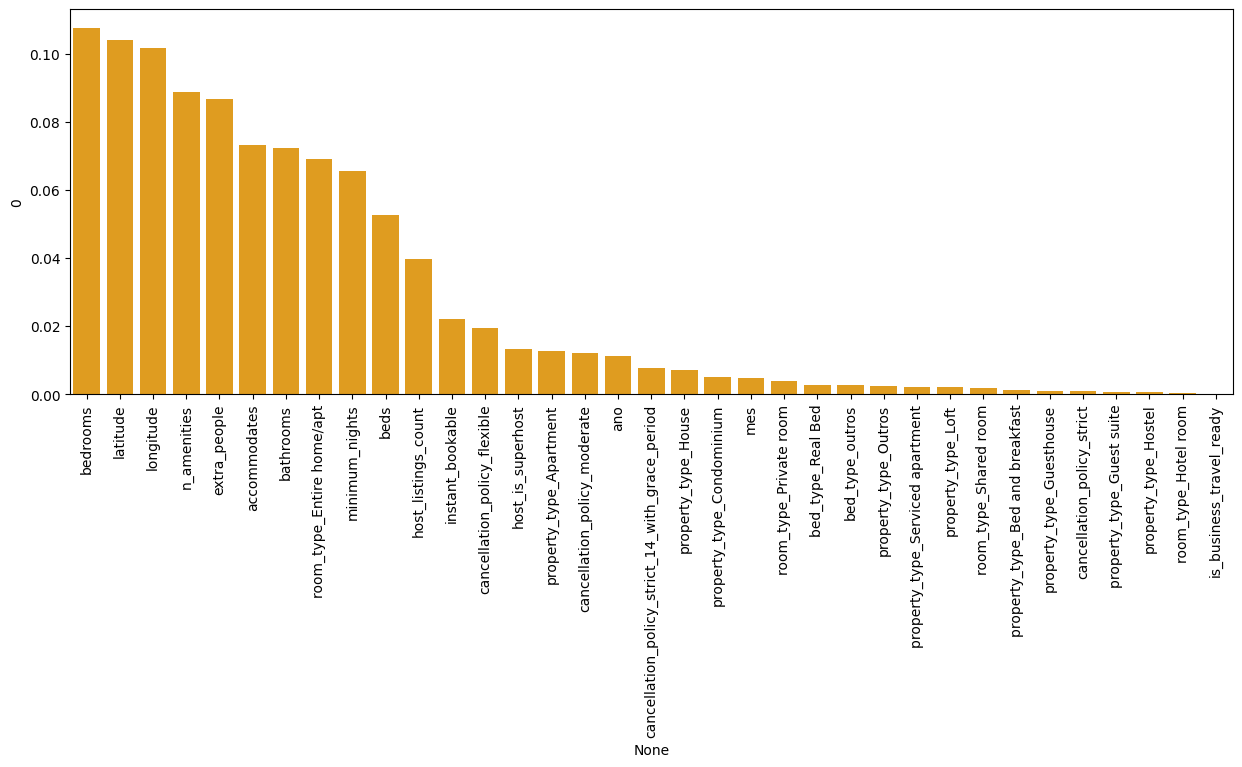

In [56]:
important = pd.DataFrame(data=model_et.feature_importances_, index=x_train.columns)
important = important.sort_values(by=0, ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=important.index, y=important[0], color='Orange')
ax.tick_params(axis='x', rotation=90)

display(important)

In [57]:
airbnb_base_cod = airbnb_base_cod.drop('is_business_travel_ready', axis=1)

y = airbnb_base_cod['price']
x = airbnb_base_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10)

model_et.fit(x_train, y_train)
forecast = model_et.predict(x_test)
print(model_assess('ExtraTrees', y_test, forecast))

Modelo ExtraTrees: 
 R²:97.50%
RSME:41.92


In [58]:
base_test = airbnb_base_cod.copy()
for column in base_test:
    if 'bed_type' in column:
        airbnb_base_cod = airbnb_base_cod.drop(column, axis=1)

y = airbnb_base_cod['price']
x = airbnb_base_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10)

model_et.fit(x_train, y_train)
forecast = model_et.predict(x_test)
print(model_assess('ExtraTrees', y_test, forecast))

Modelo ExtraTrees: 
 R²:97.48%
RSME:42.07


In [59]:
print( forecast)

[100.97 998.5  249.21 ... 126.7  260.62 119.86]


### Deploy

In [60]:
x['price'] = y
x.to_csv('dados.csv')

In [61]:
import joblib
joblib.dump(model_et, 'model.joblib')

['model.joblib']